In [1]:
import os
import sys

sys.path.append("..")
import pandas as pd
import numpy as np
import pickle
from pathlib import Path

import HH4b.utils as utils
from HH4b import plotting
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt
import mplhep as hep
import matplotlib.ticker as mticker

plt.style.use(hep.style.CMS)
hep.style.use("CMS")
formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3))
plt.rcParams.update({"font.size": 12})

In [2]:
# automatically reloads imported files on edits
%load_ext autoreload
%autoreload 2

In [3]:
jet_collection = "ak8FatJet"
# jet_collection = "bbFatJet"

## Validate GloParT in NanoAODv12

In [1]:
# input directory
MAIN_DIR = "/eos/uscms/store/user/cmantill/bbbb/skimmer/"
tag = "24Sep19_v12v2_private_pre-sel"
path_to_dir = f"{MAIN_DIR}/{tag}/"

# input files
year = "2022"
sample_dirs = {
    year: {
        "qcd": [
            "QCD_HT-1000to1200",
            #'QCD_HT-100to200',
            "QCD_HT-1200to1500",
            "QCD_HT-1500to2000",
            "QCD_HT-2000",
            #'QCD_HT-200to400',
            "QCD_HT-400to600",
            "QCD_HT-600to800",
            "QCD_HT-800to1000",
        ],
        # "ttbar": ["TTto4Q"],
    }
}
sample_dirs_sig = {
    year: {
        "hh4b": [
            "GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_TuneCP5_13p6TeV?"
        ],  # the ? enforces exact matching
        # "gghtobb": ["GluGluHto2B_PT-200_M-125"],
    }
}

# make plot and template directory
date = "24Sep19test"  # date of plotting
plot_dir = f"/uscms/home/cmantill/nobackup/hh/HH4b/plots/PostProcessing/{date}/{year}"
_ = os.system(f"mkdir -p {plot_dir}")

NameError: name 'os' is not defined

In [5]:
# examine parquet file
test_filename = "/eos/uscms/store/user/cmantill/bbbb/skimmer/24Sep18_v12v2_private_pre-sel/2022/GluGlutoHHto4B_kl-0p00_kt-1p00_c2-0p00_TuneCP5_13p6TeV/parquet/out_7.parquet"
events = pd.read_parquet(test_filename)
print(np.array(events.columns))
# for column in events.columns:
#    if column[0]=="weight":
#        print(column)

[('GenHiggsEta', 0) ('GenHiggsEta', 1) ('GenHiggsPhi', 0)
 ('GenHiggsPhi', 1) ('GenHiggsMass', 0) ('GenHiggsMass', 1)
 ('GenHiggsPt', 0) ('GenHiggsPt', 1) ('GenbEta', 0) ('GenbEta', 1)
 ('GenbEta', 2) ('GenbEta', 3) ('GenbPhi', 0) ('GenbPhi', 1)
 ('GenbPhi', 2) ('GenbPhi', 3) ('GenbMass', 0) ('GenbMass', 1)
 ('GenbMass', 2) ('GenbMass', 3) ('GenbPt', 0) ('GenbPt', 1) ('GenbPt', 2)
 ('GenbPt', 3) ('ak4JetHiggsMatch', 0) ('ak4JetHiggsMatch', 1)
 ('ak4JetHiggsMatch', 2) ('ak4JetHiggsMatch', 3) ('ak4JetHiggsMatch', 4)
 ('ak4JetHiggsMatch', 5) ('ak4JetHiggsMatchIndex', 0)
 ('ak4JetHiggsMatchIndex', 1) ('ak4JetHiggsMatchIndex', 2)
 ('ak4JetHiggsMatchIndex', 3) ('ak4JetHiggsMatchIndex', 4)
 ('ak4JetHiggsMatchIndex', 5) ('ak4JethadronFlavour', 0)
 ('ak4JethadronFlavour', 1) ('ak4JethadronFlavour', 2)
 ('ak4JethadronFlavour', 3) ('ak4JethadronFlavour', 4)
 ('ak4JethadronFlavour', 5) ('bbFatJetHiggsMatch', 0)
 ('bbFatJetHiggsMatch', 1) ('bbFatJetHiggsMatchIndex', 0)
 ('bbFatJetHiggsMatchIndex', 

In [6]:
# examine pickle file
test_filename = "/eos/uscms/store/user/cmantill/bbbb/skimmer/24Sep18_v12v2_private_pre-sel/2022/GluGlutoHHto4B_kl-0p00_kt-1p00_c2-0p00_TuneCP5_13p6TeV/pickles/out_0.pkl"
with Path(test_filename).open("rb") as file:
    out_dict = pickle.load(file)
# "totals:nevents" has the sum of genweights/events for this dataset
print(out_dict)

{'2022': {'GluGlutoHHto4B_kl-0p00_kt-1p00_c2-0p00_TuneCP5_13p6TeV': {'totals': {'nevents': 20207.758, 'np_nominal': 19264.43929951964, 'np_scale_weights': array([22189.8877088 , 21844.56324515, 19660.19548201, 18952.74984706,
       17054.3587506 , 16704.33825712]), 'np_pdf_weights': array([19263.85163617, 19264.00328734, 19222.86239277, 19272.66540863,
       19310.72039685, 19258.22712978, 19312.94879905, 19300.25629031,
       19319.71382813, 19251.08494327, 19255.02116156, 19227.62822039,
       19299.44918944, 19275.91211167, 19300.50222942, 19293.92350994,
       19268.46265197, 19268.24680225, 19258.19769249, 19264.1877756 ,
       19243.66721607, 19256.46382715, 19245.40844106, 19279.18949079,
       19227.13655447, 19260.55551648, 19244.84300359, 19237.48507747,
       19268.20782195, 19198.00703059, 19259.32810066, 19198.17453443,
       19267.02082061, 19239.00607998, 19223.51389196, 19272.37889122,
       19302.68473843, 19248.43885487, 19258.95387956, 19261.3605266 ,
     

In [7]:
from os import listdir

listdir("/eos/uscms/store/user/cmantill/bbbb/skimmer/24Sep19_v12v2_private_pre-sel/2022/")

['GluGlutoHHto4B_kl-0p00_kt-1p00_c2-0p00_TuneCP5_13p6TeV',
 'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_TuneCP5_13p6TeV',
 'GluGlutoHHto4B_kl-2p45_kt-1p00_c2-0p00_TuneCP5_13p6TeV',
 'GluGlutoHHto4B_kl-5p00_kt-1p00_c2-0p00_TuneCP5_13p6TeV',
 'QCD_HT-1000to1200',
 'QCD_HT-100to200',
 'QCD_HT-1200to1500',
 'QCD_HT-1500to2000',
 'QCD_HT-2000',
 'QCD_HT-200to400',
 'QCD_HT-400to600',
 'QCD_HT-600to800',
 'QCD_HT-800to1000',
 'TTto2L2Nu',
 'TTto4Q',
 'TTtoLNu2Q']

Load all samples

In [8]:
# columns (or branches) to load: (branch_name, number of columns)
# e.g. to load 2 jets ("ak8FatJetPt", 2)
columns = [
    ("weight", 1),  # genweight * otherweights
    (f"{jet_collection}Pt", 2),
    (f"{jet_collection}Msd", 2),
    (f"{jet_collection}PNetTXbb", 2),  # ParticleNet 130x bb vs QCD discriminator
    # (f"{jet_collection}PNetMass", 2), # ParticleNet 130x regressed mass
    (f"{jet_collection}PNetTXbbLegacy", 2),  # ParticleNet Legacy bb vs QCD discriminator
    # (f"{jet_collection}PNetMassLegacy", 2), # ParticleNet Legacy regressed mass
    (f"{jet_collection}ParTTXbb", 2),  # GloParTv2 bb vs QCD discriminator
    # (f"{jet_collection}ParTmassRes", 2), # GloParTv2  regressed mass (resonant)
    # (f"{jet_collection}ParTmassVis", 2), # GloParTv2  regressed mass (particles)
]

# additional columns for hh4b
signal_exclusive_columns = [
    (f"{jet_collection}HiggsMatchIndex", 2),  # index of higgs matched to jet
    (f"{jet_collection}NumBMatchedH1", 2),  # number of bquarks matched to H1
    (f"{jet_collection}NumBMatchedH2", 2),  # number of bquarks matched to H2
]

# apply selection on jet index
filters = [
    [
        (f"('{jet_collection}Pt', '0')", ">=", 400),
        (f"('{jet_collection}Pt', '0')", "<=", 600),
        (f"('{jet_collection}Msd', '0')", ">=", 50),
        (f"('{jet_collection}Msd', '0')", "<=", 250),
    ],
    [
        (f"('{jet_collection}Pt', '1')", ">=", 400),
        (f"('{jet_collection}Pt', '1')", "<=", 600),
        (f"('{jet_collection}Msd', '1')", ">=", 50),
        (f"('{jet_collection}Msd', '1')", "<=", 250),
    ],
]

# dictionary that will contain all information (from all samples)
events_dict = {
    # this function will load files (only the columns selected), apply filters and compute a weight per event
    **utils.load_samples(
        path_to_dir,  # input directory
        sample_dirs[year],  # process_name: datasets
        year,  # year (to find corresponding luminosity)
        filters=filters,  # do not apply filter
        columns=utils.format_columns(
            columns
        ),  # columns to load from parquet (to not load all columns), IMPORTANT columns must be formatted: ("column name", "idx")
        reorder_txbb=False,  # do not reorder bbFatJet collection (not used in this notebook)
        variations=False,  # do not load systematic variations of weigths
    ),
    **utils.load_samples(
        path_to_dir,
        sample_dirs_sig[year],
        year,
        filters=filters,
        columns=utils.format_columns(columns + signal_exclusive_columns),
        reorder_txbb=False,
        variations=False,
    ),
}

Loading QCD_HT-1000to1200
Loaded QCD_HT-1000to1200                                 : 7317714 entries
Loading QCD_HT-1200to1500
Loaded QCD_HT-1200to1500                                 : 3847689 entries
Loading QCD_HT-1500to2000
Loaded QCD_HT-1500to2000                                 : 1236471 entries
Loading QCD_HT-2000
Loaded QCD_HT-2000                                       : 340684 entries
Loading QCD_HT-400to600
Loaded QCD_HT-400to600                                   : 113 entries
Loading QCD_HT-600to800
Loaded QCD_HT-600to800                                   : 69870 entries
Loading QCD_HT-800to1000
Loaded QCD_HT-800to1000                                  : 3007197 entries
Loading GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_TuneCP5_13p6TeV
Loaded GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_TuneCP5_13p6TeV: 29562 entries


In [9]:
path_to_dir

'/eos/uscms/store/user/cmantill/bbbb/skimmer//24Sep19_v12v2_private_pre-sel/'

In [10]:
events_dict.keys()

dict_keys(['qcd', 'hh4b'])

In [11]:
events_dict["hh4b"]

weight ak8FatJetPt             ak8FatJetMsd              \
              0           0           1            0           1   
0      2.430832  452.108643  325.357086   161.375000   12.078125   
1      1.116419  710.633728  598.852844     1.780273  118.812500   
2      1.010779  460.426483  354.553711   130.000000  127.000000   
3      5.027075  428.743134  428.603516    28.328125  182.625000   
4      3.114773  402.414612  402.357178   126.812500  132.875000   
...         ...         ...         ...          ...         ...   
29557 -3.441597  599.329285  560.767395   127.937500  129.750000   
29558  0.808003  462.467346  353.488007   157.375000  104.625000   
29559  4.932489  423.065186  271.231781    91.187500   59.343750   
29560  2.285198  446.159241  437.694427   185.375000   21.906250   
29561 -4.807234  480.645844  483.969299   114.437500   14.132812   

      ak8FatJetPNetTXbb           ak8FatJetPNetTXbbLegacy            \
                      0         1                       0         1   
0              0.948730  0.942383                0.951380  0.973904   
1              0.951172  0.958496                0.488600  0.990529   
2              0.436035  0.983887                0.936139  0.996898   
3              0.098450  0.682617                0.612033  0.963038   
4              0.930176  0.859863                0.976441  0.953759   
...                 ...       ...                     ...       ...   
29557          0.996094  0.993164                0.998441  0.994129   
29558          0.001536  0.948730                0.000826  0.969548   
29559          0.872070  0.291016                0.956543  0.709970   
29560          0.417725  0.005226                0.841441  0.001386   
29561          0.994141  0.001112                0.994688  0.000297   

      ak8FatJetParTTXbb           ak8FatJetHiggsMatchIndex         \
                      0         1                        0      1   
0              0.829102  0.611816                        0      1   
1              0.114502  0.934082                        0      1   
2              0.556152  0.974609                        1      0   
3              0.333252  0.532715                        0      1   
4              0.869141  0.814453                        1      0   
...                 ...       ...                      ...    ...   
29557          0.993652  0.838379                        0      1   
29558          0.000327  0.919434                        0      1   
29559          0.741211  0.205811                        1      0   
29560          0.629395  0.000432                        1 -99999   
29561          0.993652  0.000171                        0 -99999   

      ak8FatJetNumBMatchedH1    ak8FatJetNumBMatchedH2    weight_noxsec  \
                           0  1                      0  1             0   
0                          2  0                      0  1      0.026342   
1                          1  0                      0  2      0.012098   
2                          0  2                      2  0      0.010953   
3                          2  0                      0  2      0.054476   
4                          0  2                      2  0      0.033753   
...                      ... ..                    ... ..           ...   
29557                      2  0                      0  2     -0.037295   
29558                      2  0                      0  2      0.008756   
29559                      0  1                      2  0      0.053451   
29560                      0  0                      1  0      0.024763   
29561                      2  0                      0  0     -0.052093   

      finalWeight  
                   
0        0.000037  
1        0.000017  
2        0.000016  
3        0.000078  
4        0.000048  
...           ...  
29557   -0.000053  
29558    0.000012  
29559    0.000076  
29560    0.000035  
29561   -0.000074  

[29562 rows x 19 columns]

Learn how to match Higgs

In [12]:
events = events_dict["hh4b"]

indexak8 = events[f"{jet_collection}HiggsMatchIndex"].to_numpy()  # index of higgs matched to jet
nbh1ak8 = events[f"{jet_collection}NumBMatchedH1"].to_numpy()  # number of bquarks matched to H1
nbh2ak8 = events[f"{jet_collection}NumBMatchedH2"].to_numpy()  # number of bquarks matched to H2

matched_to_h1 = (indexak8 == 0) & (nbh1ak8 == 2)
matched_to_h2 = (indexak8 == 1) & (nbh2ak8 == 2)
matchedak8 = matched_to_h1 | matched_to_h2

In [13]:
# boolean that indicates whether that FatJet is matched to a Higgs boson or not
matchedak8

array([[ True, False],
       [False,  True],
       [ True,  True],
       ...,
       [ True, False],
       [False, False],
       [ True, False]])

Event selection for ROC curve

In [14]:
# only select signal events that are matched
events_dict["hh4b_matched"] = events_dict["hh4b"][matchedak8]

In [15]:
sig_key = "hh4b_matched"
bg_keys = ["qcd"]
discriminator = f"{jet_collection}PNetTXbb"

# 1 for signal, 0 for background
y_true_0 = np.concatenate(
    [
        np.ones(len(events_dict[sig_key])),
        np.zeros(np.sum(len(events_dict[bg_key]) for bg_key in bg_keys)),
    ]
)
y_true_1 = np.concatenate(
    [
        np.ones(len(events_dict[sig_key])),
        np.zeros(np.sum(len(events_dict[bg_key]) for bg_key in bg_keys)),
    ]
)
# weights
weights_0 = np.concatenate(
    [events_dict[sig_key]["finalWeight"]]
    + [events_dict[bg_key]["finalWeight"] for bg_key in bg_keys],
)
weights_1 = np.concatenate(
    [events_dict[sig_key]["finalWeight"]]
    + [events_dict[bg_key]["finalWeight"] for bg_key in bg_keys],
)
# discriminator
scores_0 = np.concatenate(
    [events_dict[sig_key][discriminator][0]]
    + [events_dict[bg_key][discriminator][0] for bg_key in bg_keys],
)
scores_1 = np.concatenate(
    [events_dict[sig_key][discriminator][1]]
    + [events_dict[bg_key][discriminator][1] for bg_key in bg_keys],
)
y_true = np.concatenate([y_true_0, y_true_1])
scores = np.concatenate([scores_0, scores_1])
weights = np.concatenate([weights_0, weights_1])
fpr, tpr, thresholds = roc_curve(y_true, scores, sample_weight=weights)

roc = {
    "fpr": fpr,
    "tpr": tpr,
    "thresholds": thresholds,
    "label": "ParticleNet v12 Hbb vs QCD",
    "color": "orange",
    "auc": auc(fpr, tpr),
}

/tmp/ipykernel_687757/901248539.py:9: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  np.zeros(np.sum(len(events_dict[bg_key]) for bg_key in bg_keys)),
/tmp/ipykernel_687757/901248539.py:15: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  np.zeros(np.sum(len(events_dict[bg_key]) for bg_key in bg_keys)),


In [18]:
events_dict["hh4b_matched"][f"{jet_collection}PNetTXbb"]

,0,1
0,0.951172,0.958496
1,0.098450,0.682617
1,0.098450,0.682617
2,0.930176,0.859863
2,0.930176,0.859863
...,...,...
11559,0.844238,0.136597
11560,0.997070,0.994141
11560,0.997070,0.994141
11561,0.996094,0.993164


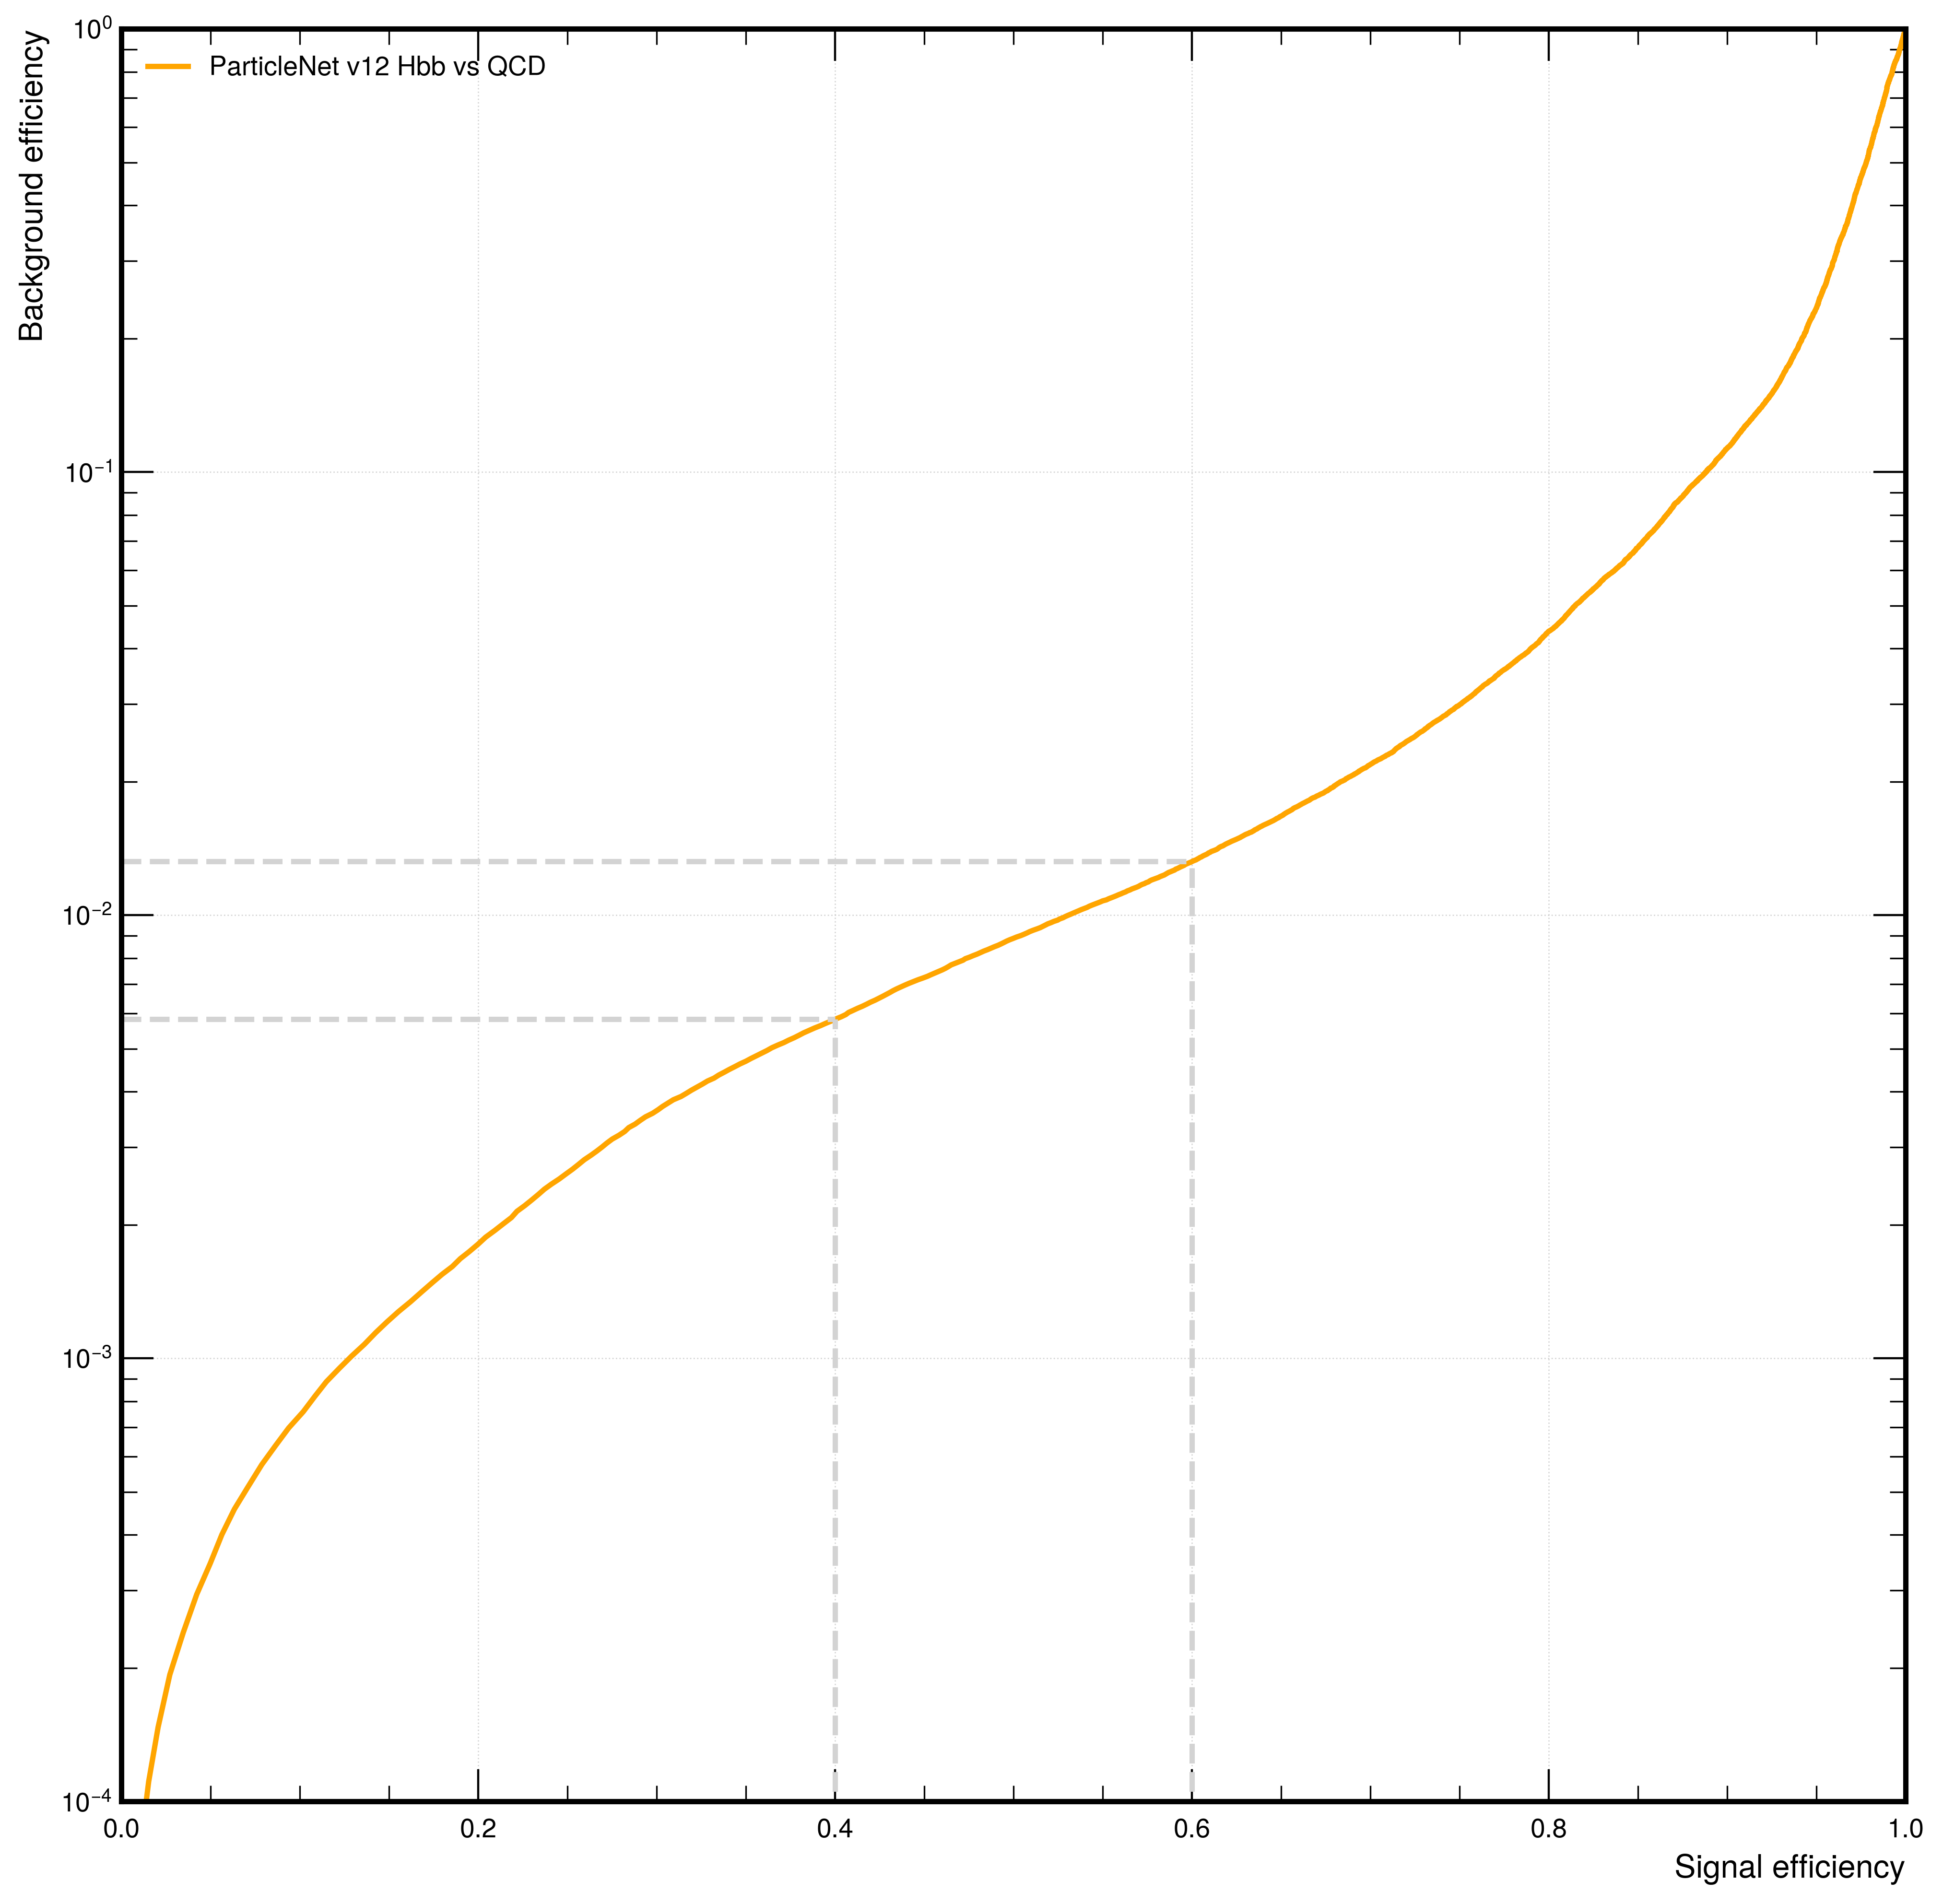

: 

In [17]:
plotting.multiROCCurveGrey(
    {"bb": {discriminator: roc}},
    sig_effs=[0.4, 0.6],
    xlim=[0, 1.0],
    ylim=[1e-4, 1],
    show=True,
    plot_dir=Path(plot_dir),
    name="test",
)

In [16]:
def get_roc_curve(
    discriminator_name, discriminator_label, discriminator_color, jet_index, sig_key="hh4b_matched"
):
    bg_keys = ["qcd"]
    discriminator = f"{jet_collection}{discriminator_name}"

    # 1 for signal, 0 for background
    y_true = np.concatenate(
        [
            np.ones(len(events_dict[sig_key])),
            np.zeros(np.sum(len(events_dict[bg_key]) for bg_key in bg_keys)),
        ]
    )
    # weights
    weights = np.concatenate(
        [events_dict[sig_key]["finalWeight"]]
        + [events_dict[bg_key]["finalWeight"] for bg_key in bg_keys],
    )
    # discriminator
    scores = np.concatenate(
        [events_dict[sig_key][discriminator][jet_index]]
        + [events_dict[bg_key][discriminator][jet_index] for bg_key in bg_keys],
    )
    fpr, tpr, thresholds = roc_curve(y_true, scores, sample_weight=weights)
    roc = {
        "fpr": fpr,
        "tpr": tpr,
        "thresholds": thresholds,
        "label": discriminator_label,
        "color": discriminator_color,
        "auc": auc(fpr, tpr),
    }

    return roc

In [19]:
rocs_jet = {
    "PNetTXbb": get_roc_curve("PNetTXbb", "ParticleNet 103X Hbb vs QCD", "orange", jet_index_roc),
    "PNetTXbbLegacy": get_roc_curve(
        "PNetTXbbLegacy", "ParticleNet Legacy Hbb vs QCD", "blue", jet_index_roc
    ),
    "ParTTXbb": get_roc_curve("ParTTXbb", "GloParTv2 Hbb vs QCD", "red", jet_index_roc),
}

/tmp/ipykernel_4144587/111972173.py:9: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  np.zeros(np.sum(len(events_dict[bg_key]) for bg_key in bg_keys)),
/tmp/ipykernel_4144587/111972173.py:9: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  np.zeros(np.sum(len(events_dict[bg_key]) for bg_key in bg_keys)),
/tmp/ipykernel_4144587/111972173.py:9: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  np.zeros(np.sum(len(events_dict[bg_key]) for bg_key in bg_keys)),


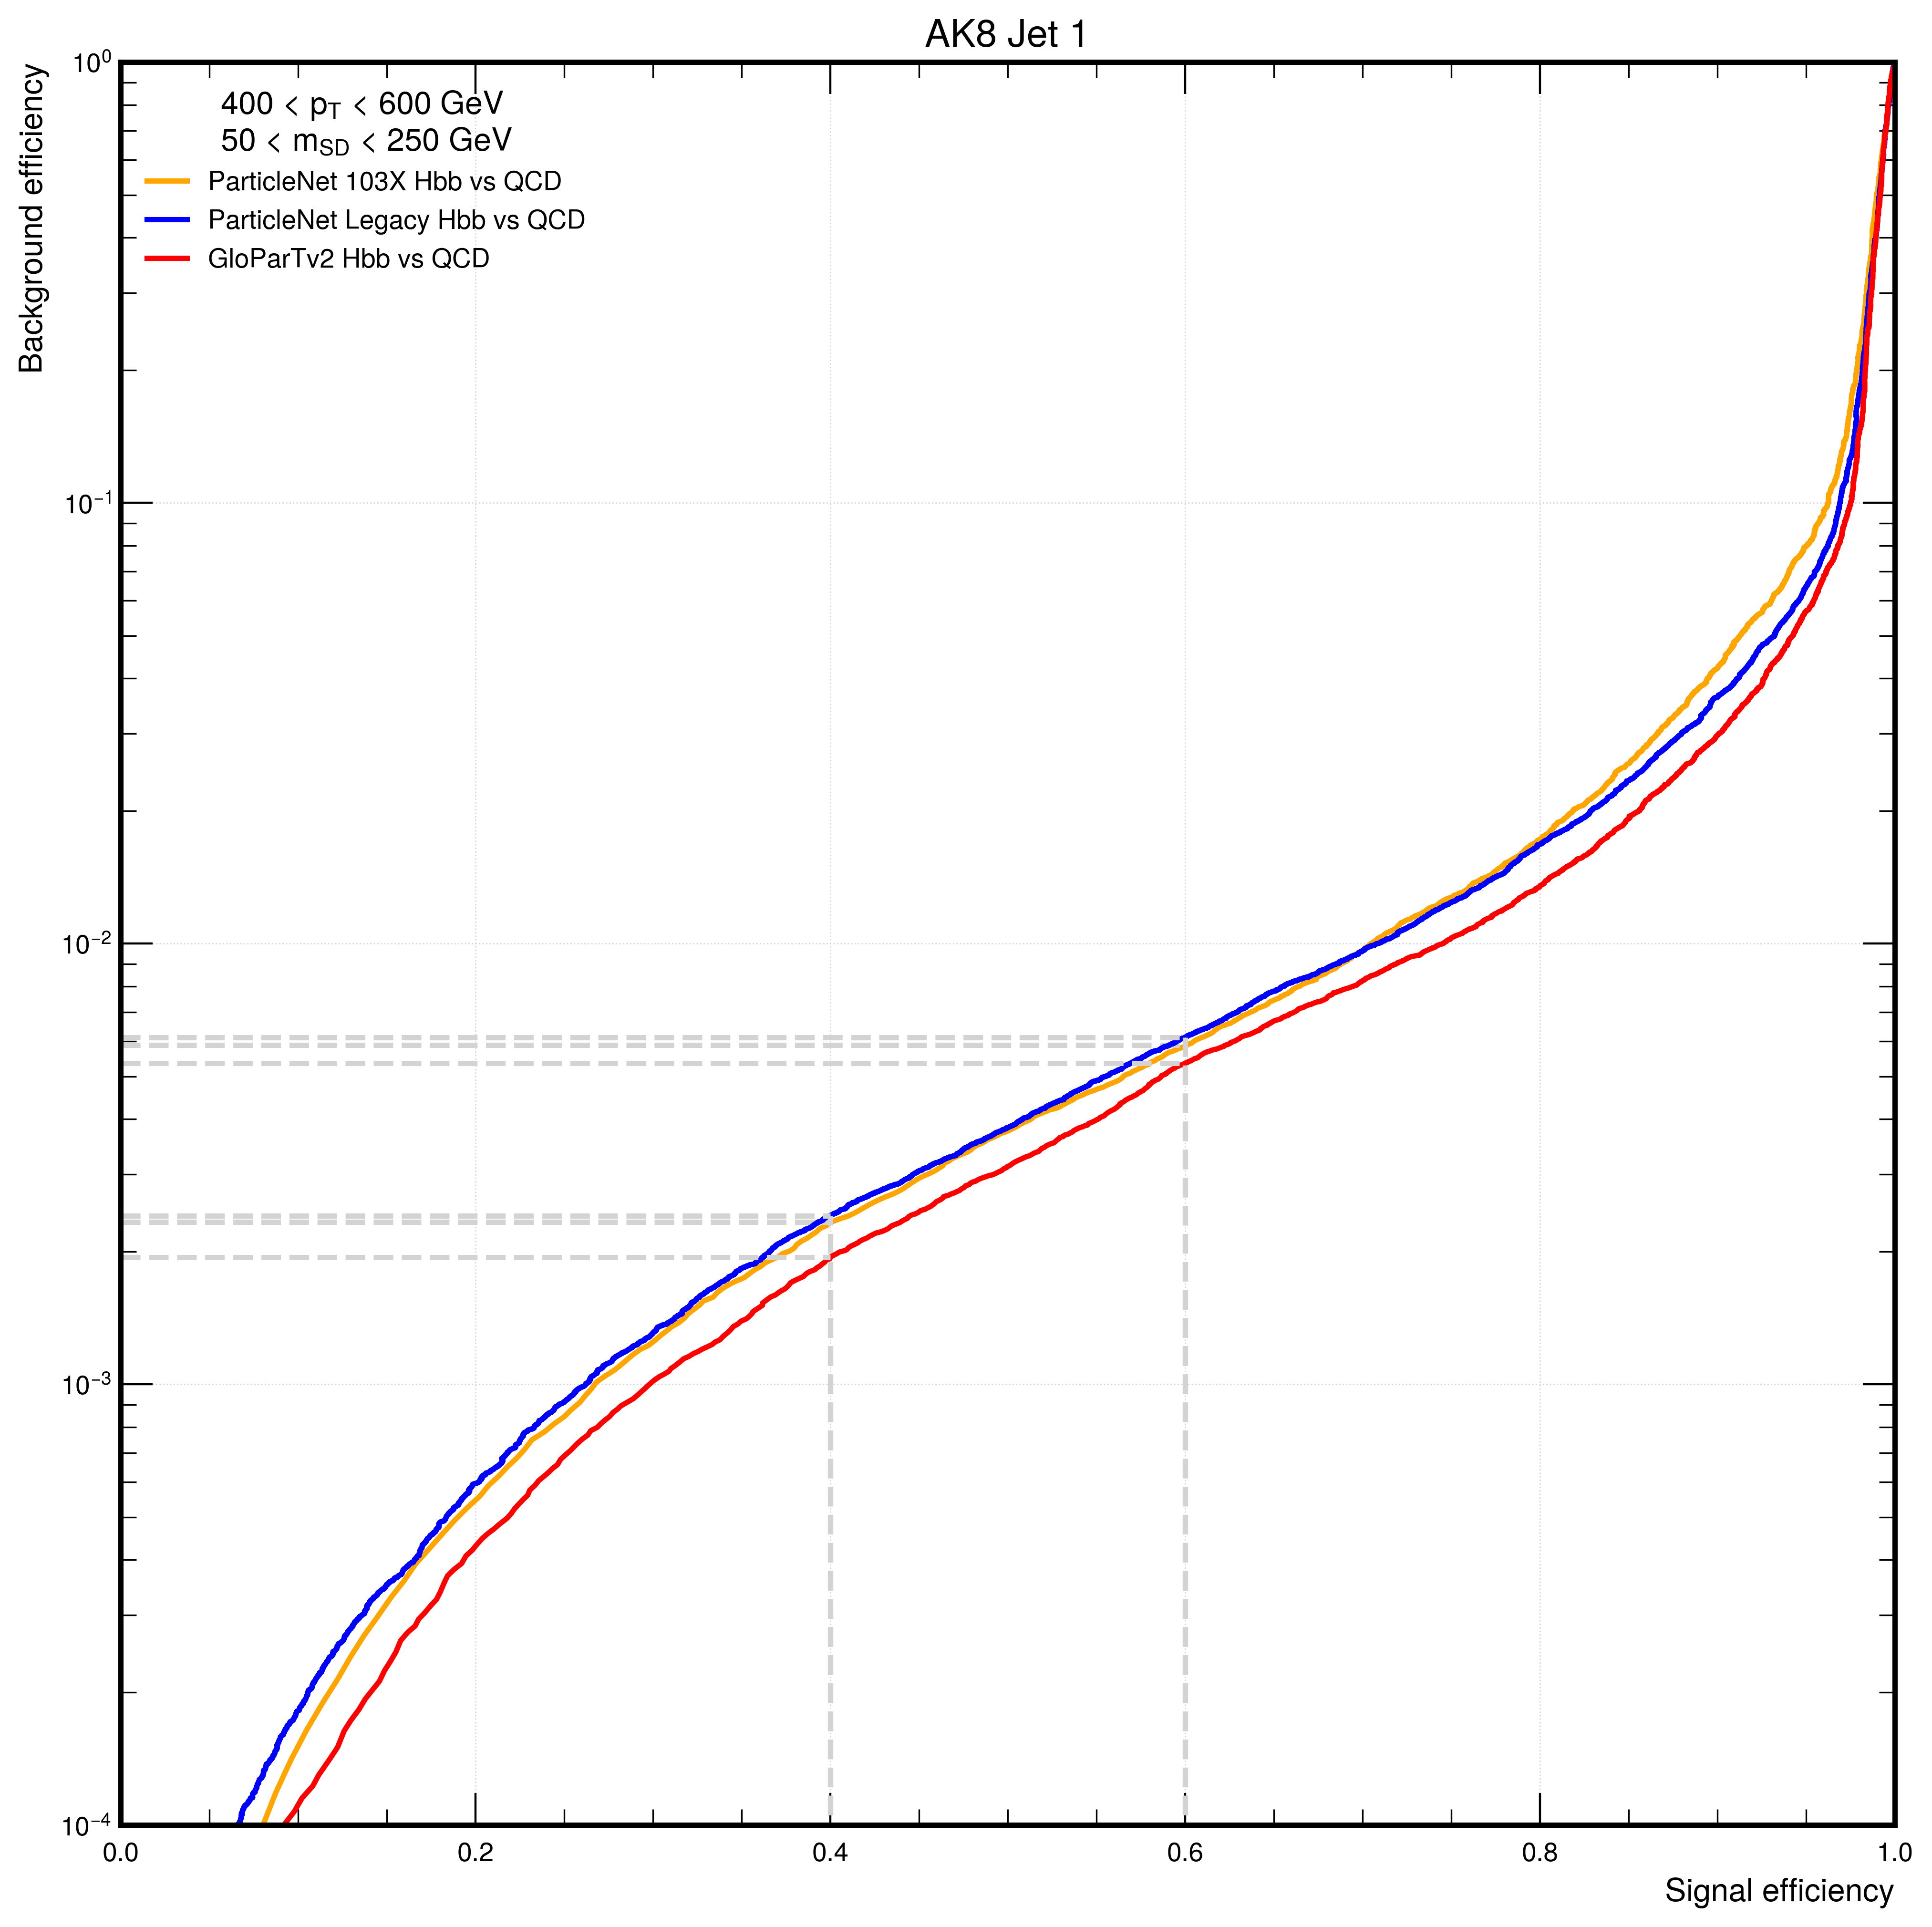

In [20]:
plotting.multiROCCurveGrey(
    {"bb": rocs_jet},
    sig_effs=[0.4, 0.6],
    xlim=[0, 1.0],
    ylim=[1e-4, 1],
    show=True,
    plot_dir=Path(plot_dir),
    name=f"{jet_collection}{jet_index_roc}ROC",
    title=f"AK8 Jet {jet_index_roc}",
    legtitle=r"400 < $p_T$ < 600 GeV" + "\n" + r"50 < $m_{SD}$ < 250 GeV",
)